<a href="https://colab.research.google.com/github/demichie/Principles-of-Numerical-Modelling-in-Geosciences/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Numerical Solution of Ordinary Differential Equations: The Euler Methods

In the preceding chapter, we established the fundamental role of differential equations and equipped ourselves with essential Python tools. We saw how, for simple ODEs, exact analytical solutions can be derived. However, most real-world systems are too complex for such treatment. It is in these scenarios that **numerical methods** become indispensable.

This chapter marks our first foray into developing and implementing these methods. Using the radioactive decay ODE as our test case, we will:
- Derive and implement the **Explicit (Forward) Euler method**.
- Investigate the crucial concept of **numerical stability**.
- Introduce the **Implicit (Backward) Euler method** and its superior stability properties.
- Explore how to quantify the **accuracy** of our numerical solutions by defining and calculating errors.
- Discuss the interplay between **accuracy, stability, and computational cost**.

## 3.1 Numerical Solutions for Ordinary Differential Equations

While analytical solutions like $N(t) = N_0 e^{-\lambda t}$ are ideal, they are often impossible to find for complex problems involving nonlinearities, time-varying external forces, or coupled equations.

Numerical methods provide a way to *approximate* the solution at a series of discrete points. The core idea is to start from a known initial condition and then "march" forward, step by step, calculating an approximate value for the solution at each new point.

### 3.1.1 Numerical Solution of Radioactive Decay: The Explicit Euler Method

Let's return to the ODE for radioactive decay:
$$
\frac{dN}{dt} = -\lambda N(t)
$$
with an initial condition $N(0) = N_0$. We want to find an approximate solution $N^k$ at discrete time points $t_k=t_0+k\Delta t$.

The core idea is to replace the derivative $\frac{dN}{dt}$ with a **forward finite difference approximation**:
$$
\frac{dN}{dt} \bigg|_{t_k} \approx \frac{N^{k+1} - N^k}{\Delta t}
$$
In the **Explicit Euler method**, we evaluate the right-hand side of the ODE ($-\lambda N$) at the current, known time $t_k$:
$$
\frac{N^{k+1} - N^k}{\Delta t} = -\lambda N^k
$$
Rearranging to solve for the unknown next value, $N^{k+1}$, gives the update formula:
$$
N^{k+1} = N^k (1 - \lambda \Delta t)
$$

#### Python Implementation of the Explicit Euler Method
Let's implement this algorithm in Python. The following code is a direct translation of the Explicit Euler method applied to our problem.

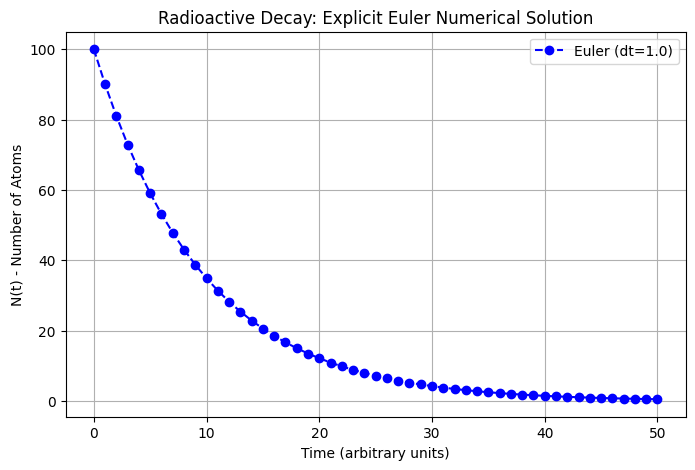

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the decay process and numerical solution
lambda_decay_const = 0.1  # Decay constant (lambda)
N0_initial = 100         # Initial number of atoms
T_final_time = 50        # Total simulation time
dt_time_step = 1.0         # Time step size

# Create an array to store time points
time_points = np.arange(0, T_final_time + dt_time_step, dt_time_step)
num_steps = len(time_points)

# Initialize an array to store the numerical solution N at each time point
N_euler_solution = np.zeros(num_steps)
N_euler_solution[0] = N0_initial  # Set the initial condition

# Time integration loop using the Explicit Euler formula
for k in range(num_steps - 1): # Loop from 0 to num_steps-2
    N_euler_solution[k+1] = N_euler_solution[k] * (1 - lambda_decay_const * dt_time_step)

# Plotting the numerical solution
plt.figure(figsize=(8, 5))
plt.plot(time_points, N_euler_solution, 'o--', label=f'Euler (dt={dt_time_step})', color='blue')
plt.xlabel("Time (arbitrary units)")
plt.ylabel("N(t) - Number of Atoms")
plt.title("Radioactive Decay: Explicit Euler Numerical Solution")
plt.legend()
plt.grid(True)
plt.show()

The plot above shows the numerical solution for radioactive decay obtained using the Explicit Euler method. The markers indicate the discrete time points at which the solution is calculated. The dashed line connecting the points helps visualize the overall trend, which qualitatively resembles the expected exponential decay.

The Explicit Euler method works by assuming the rate of change is constant over each time step, equal to the rate at the *beginning* of the step. This is a simple but powerful idea, but as we will see, it has limitations.

<div class="alert alert-block alert-info">
    <b>Concept Check!</b>
    <br>
    The true solution curve for radioactive decay, $N(t) = N_0 e^{-\lambda t}$, is convex (it curves upwards). The Explicit Euler method approximates the next step by moving along the tangent at the current point.
    <br><br>
    Given this, do you expect the Explicit Euler method to generally <b>overestimate</b> or <b>underestimate</b> the true solution for $N(t)$?
</div>

## 3.2 Numerical Stability of the Explicit Euler Method

The simplicity of the Explicit Euler method comes with a critical caveat: **conditional stability**. Let's investigate what happens when we use a much larger time step, $\Delta t = 15.0$.

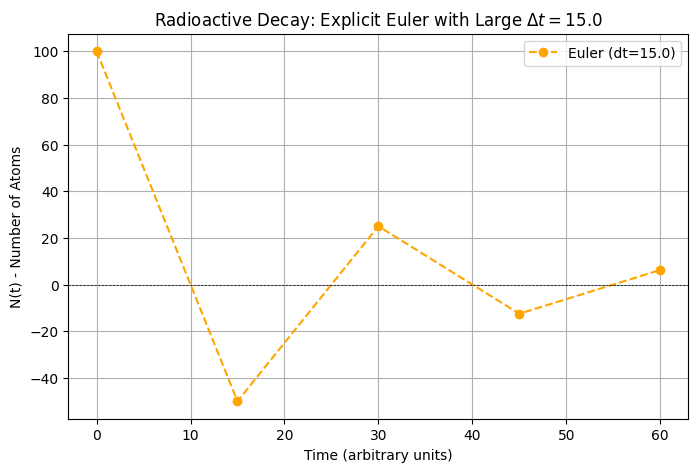

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (lambda_decay_const and N0_initial from previous example)
lambda_decay_const = 0.1
N0_initial = 100
T_final_time = 50
dt_large = 15.0  # Significantly larger time step

time_points_large_dt = np.arange(0, T_final_time + dt_large, dt_large)
num_steps_large_dt = len(time_points_large_dt)

N_euler_large_dt = np.zeros(num_steps_large_dt)
N_euler_large_dt[0] = N0_initial

for k in range(num_steps_large_dt - 1):
    N_euler_large_dt[k+1] = N_euler_large_dt[k] * \
                            (1 - lambda_decay_const * dt_large)

# Plotting the result
plt.figure(figsize=(8, 5))
plt.plot(time_points_large_dt, N_euler_large_dt, 'o--',
         label=f'Euler (dt={dt_large})', color='orange')
plt.axhline(0, color='black', lw=0.5, linestyle='--') # Zero line for reference
plt.xlabel("Time (arbitrary units)")
plt.ylabel("N(t) - Number of Atoms")
plt.title(f"Radioactive Decay: Explicit Euler with Large $\Delta t = {dt_large}$")
plt.legend()
plt.grid(True)
plt.show()

The plot shows that with $\Delta t = 15.0$, the solution oscillates and takes on unphysical negative values. This is **numerical instability**. A method is stable if small errors don't grow uncontrollably.

For this problem, the stability condition for the Explicit Euler method is $\Delta t \le \frac{1}{\lambda}$. In our case, $\Delta t \le \frac{1}{0.1} = 10$. Since we chose $\Delta t = 15.0$, which violates this condition, the result is oscillatory and unphysical. The more general condition to avoid growing oscillations is $\Delta t \le \frac{2}{\lambda}$.

## 3.3 The Implicit Euler (Backward Euler) Method

An alternative is to evaluate the right-hand side of the ODE at the *next* (unknown) time level $n+1$. This gives the **Implicit (or Backward) Euler method**:
$$
\frac{N^{n+1} - N^n}{\Delta t} = -\lambda N^{n+1}
$$
The unknown $N^{n+1}$ appears on both sides. For this linear problem, we can solve for it algebraically:
$$
N^{n+1} = \frac{N^n}{1 + \lambda \Delta t}
$$
Notice the update term $1/(1 + \lambda \Delta t)$. Since $\lambda > 0$ and $\Delta t > 0$, this term is always between 0 and 1. This means the solution will always decay and remain positive, regardless of the size of $\Delta t$. The method is **unconditionally stable**.

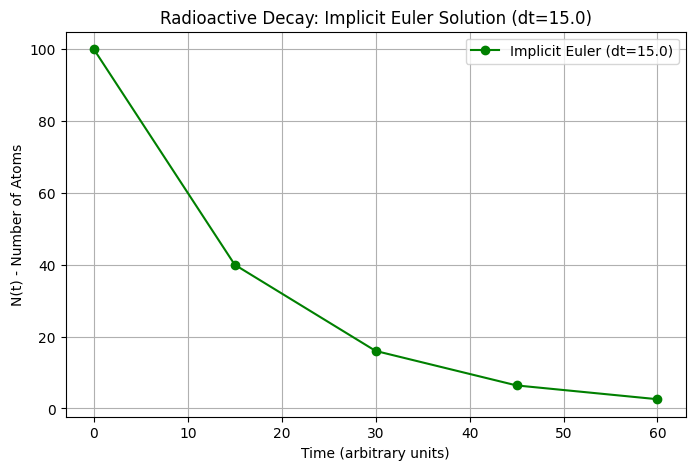

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (can reuse from previous examples or define new)
lambda_val_imp = 0.1 # Decay constant
dt_implicit = 15.0   # Time step (can be large, e.g., same as unstable explicit case)
T_final_imp = 60     # Total time
N0_imp = 100         # Initial quantity

times_imp = np.arange(0, T_final_imp + dt_implicit, dt_implicit)
num_steps_imp = len(times_imp)

N_implicit_solution = np.zeros(num_steps_imp)
N_implicit_solution[0] = N0_imp

# Time integration loop using the Implicit Euler formula
for k in range(num_steps_imp - 1):
    N_implicit_solution[k+1] = N_implicit_solution[k] / \
                               (1 + lambda_val_imp * dt_implicit)

# Plotting the implicit solution
plt.figure(figsize=(8, 5))
plt.plot(times_imp, N_implicit_solution, 'o-',
         label=f'Implicit Euler (dt={dt_implicit})', color='green')
plt.xlabel("Time (arbitrary units)")
plt.ylabel("N(t) - Number of Atoms")
plt.title(f"Radioactive Decay: Implicit Euler Solution (dt={dt_implicit})")
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
    <b>Concept Check!</b>
    <br>
    Explain, conceptually, why the term $(1-\lambda\Delta t)$ in the explicit scheme can lead to unphysical results if $\Delta t$ is too large, while the term $1/(1+\lambda\Delta t)$ in the implicit scheme prevents this.
</div>

## 3.4 Assessing Numerical Solutions: Accuracy and Error

Stability is essential, but so is **accuracy**: how close is the numerical solution to the true one? We can quantify this by calculating the error.

- **Absolute Error:** $\varepsilon_{\text{abs}}(t_k) = |N_{\text{exact}}(t_k) - N_{\text{num}}(t_k)|$
- **Relative Error:** $\varepsilon_{\text{rel}}(t_k) = \frac{|N_{\text{exact}}(t_k) - N_{\text{num}}(t_k)|}{|N_{\text{exact}}(t_k)|}$

Let's visualize the error of the Explicit Euler method by comparing it to the known analytical solution.

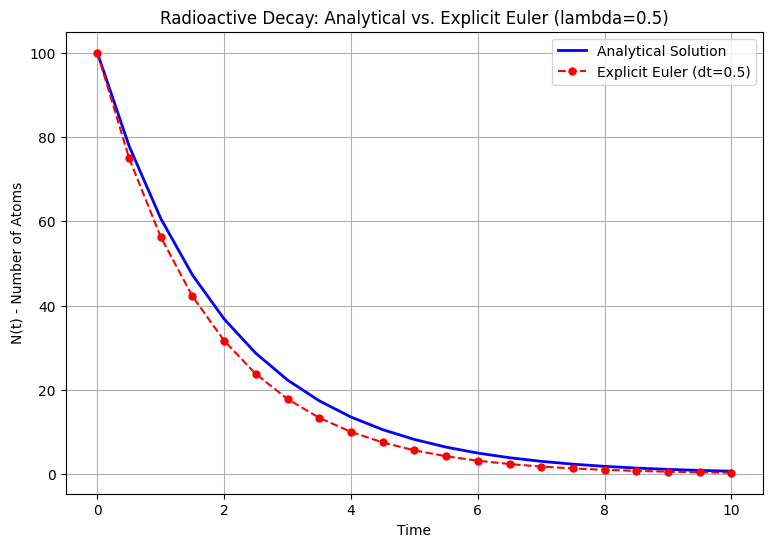

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_coeff = 0.5  # A slightly larger lambda to see effects more quickly
N0_val = 100
t_max_comp = 10.0
dtComp = 0.5     # Time step for comparison

time_vals_comp = np.arange(0, t_max_comp + dtComp, dtComp)
num_steps_comp = len(time_vals_comp)

# Analytical solution
N_analytical = N0_val * np.exp(-lambda_coeff * time_vals_comp)

# Explicit Euler numerical solution
N_explicit_comp = np.zeros(num_steps_comp)
N_explicit_comp[0] = N0_val
for k in range(num_steps_comp - 1):
    N_explicit_comp[k+1] = N_explicit_comp[k] * \
                           (1 - lambda_coeff * dtComp)

# Plotting both solutions
plt.figure(figsize=(9, 6))
plt.plot(time_vals_comp, N_analytical, 'b-', lw=2, label='Analytical Solution')
plt.plot(time_vals_comp, N_explicit_comp, 'ro--', markersize=5,
         label=f'Explicit Euler (dt={dtComp})')
plt.xlabel("Time")
plt.ylabel("N(t) - Number of Atoms")
plt.title(f"Radioactive Decay: Analytical vs. Explicit Euler (lambda={lambda_coeff})")
plt.legend()
plt.grid(True)
plt.show()

To quantify the deviation more directly, we can compute and plot the absolute error $\varepsilon_{\text{abs}}(t_k)$ at each time step.

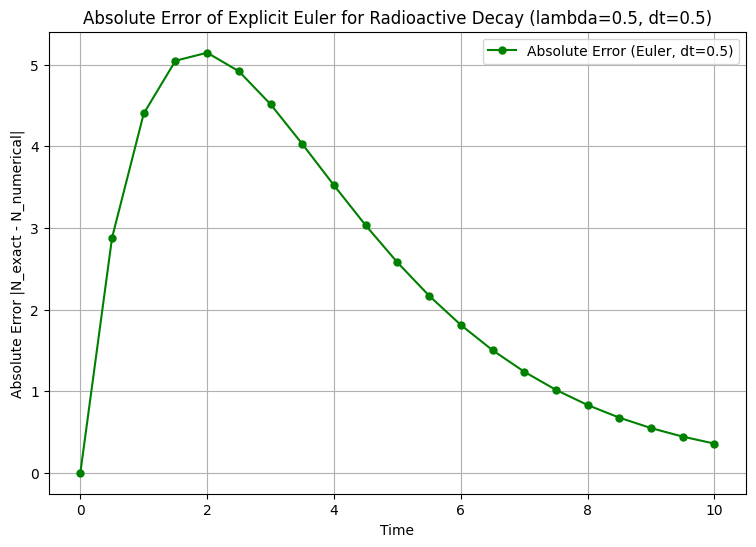

In [5]:
# Assuming N_analytical and N_explicit_comp are available from the previous code cell
# and were computed on the same time_vals_comp grid.

# Compute absolute error
absolute_error_euler = np.abs(N_analytical - N_explicit_comp)

# Plotting the absolute error
plt.figure(figsize=(9, 6))
plt.plot(time_vals_comp, absolute_error_euler, 'g-o', markersize=5,
         label=f'Absolute Error (Euler, dt={dtComp})')
plt.xlabel("Time")
plt.ylabel("Absolute Error |N_exact - N_numerical|")
plt.title(f"Absolute Error of Explicit Euler for Radioactive Decay (lambda={lambda_coeff}, dt={dtComp})")
plt.legend()
plt.grid(True)
plt.show()

The **relative error** normalizes the absolute error by the magnitude of the true solution, which can be more informative when the solution's magnitude changes significantly.

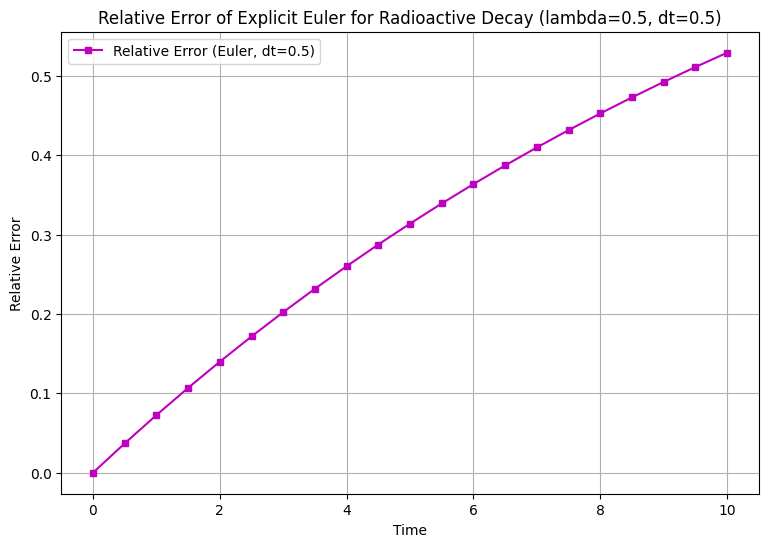

In [6]:
# Assuming N_analytical and N_explicit_comp are available from previous cells
# and were computed on the same time_vals_comp grid.

# Compute relative error, avoiding division by zero if N_analytical can be zero
# (For exponential decay N_analytical is always > 0 for finite N0 > 0)
# A small epsilon can be added to the denominator for general robustness.
epsilon = 1e-15 # To prevent division by zero if N_analytical is truly zero
relative_error_euler = np.abs(N_analytical - N_explicit_comp) / (np.abs(N_analytical) + epsilon)

# Plotting the relative error
plt.figure(figsize=(9, 6))
plt.plot(time_vals_comp, relative_error_euler, 'm-s', markersize=5,
         label=f'Relative Error (Euler, dt={dtComp})')
plt.xlabel("Time")
plt.ylabel("Relative Error")
plt.title(f"Relative Error of Explicit Euler for Radioactive Decay (lambda={lambda_coeff}, dt={dtComp})")
plt.legend()
plt.grid(True)
# plt.ylim(0, max(0.1, np.max(relative_error_euler)*1.1)) # Optional: adjust y-limits
plt.show()

<div class="alert alert-block alert-info">
    <b>Concept Check!</b>
    <br>
    Imagine you are modeling the concentration of a rare trace element. Its concentration starts very low, increases significantly, and then decays back to very low levels. If you want to assess the accuracy of your numerical solution, would absolute error or relative error be more consistently informative? Why?
</div>

## 3.5 Challenges with Nonlinear ODEs: Implicit Methods and Root-Finding

Implicit schemes are often favored for their superior stability. But if the ODE is nonlinear, this stability comes at the cost of needing to solve a (potentially nonlinear) algebraic equation at every iteration. Let's explore this with a relevant geoscience example.

### 3.5.1 Example: Water Infiltration into Soil – A Nonlinear ODE

A simplified, lumped-parameter model for water drainage from soil can be formulated as an ODE where the volumetric water content $\theta(t)$ changes over time:
$$
\frac{d\theta}{dt} = -K(\theta) = -K_s \theta^m
$$
This is a **nonlinear ODE** because the right-hand side depends on $\theta^m$, where the exponent $m \neq 1$.

*The figure below provides a conceptual illustration of this drainage process.*

*(In a real notebook, you would insert the image `soil.png` here. This is the corresponding caption)*

> **Figure Caption:** A simplified model of gravity-driven drainage in a soil column, a process governed by a nonlinear ODE. The figure shows three snapshots in time:
> **(Left)** In a 'wetter' state, the high volumetric water content, $\theta(t)$, leads to a high rate of water drainage (many arrows).
> **(Center)** As water drains, the soil becomes 'moist', and the drainage rate decreases.
> **(Right)** In a 'drier' state, both the water content and the drainage rate are significantly lower.
> This visualizes the core principle that the rate of change, $\frac{d\theta}{dt}$, depends on the current value of $\theta(t)$.

### 3.5.1 Explicit Euler Scheme for the Infiltration ODE

Applying the Explicit (Forward) Euler method to Equation $\frac{d\theta}{dt} = -K_s \theta^m$ is straightforward. Let $\theta^k$ be the water content at time $t_k$. The update formula for $\theta^{k+1}$ is:
$$
\theta^{k+1} = \theta^k - \Delta t \cdot K_s \cdot (\theta^k)^m
$$
All terms on the right-hand side are known from time level $k$, so $\theta^{k+1}$ can be calculated directly. An example implementation snippet is shown below.

In [7]:
# Parameters assumed defined: Ks, m_exponent, dt, theta0
# t_array = np.arange(0, Tmax + dt, dt)
# theta_explicit_sol = np.zeros_like(t_array)
# theta_explicit_sol[0] = theta0

# Time integration loop (core part)
# for k_step in range(len(t_array) - 1):
#     theta_prev = theta_explicit_sol[k_step]
#     theta_explicit_sol[k_step+1] = theta_prev - \
#                                    dt * Ks * (theta_prev ** m_exponent)

### 3.5.2 Implicit Euler Scheme for the Infiltration ODE: The Challenge

Now, let's apply the Implicit (Backward) Euler method. We evaluate the right-hand side at the unknown future time level $k+1$:
$$
\frac{\theta^{k+1} - \theta^k}{\Delta t} = -K_s (\theta^{k+1})^m
$$
Rearranging to try and solve for $\theta^{k+1}$:
$$
\theta^{k+1} + \Delta t \cdot K_s \cdot (\theta^{k+1})^m - \theta^k = 0
$$
This is a **nonlinear algebraic equation** for the unknown $\theta^{k+1}$. Unlike the linear radioactive decay problem, we cannot simply isolate $\theta^{k+1}$ with basic algebra.

To find $\theta^{k+1}$ at each time step, we need to find the root $X = \theta^{k+1}$ of the function:
$$
G(X) = X + \Delta t \cdot K_s \cdot X^m - \theta^k
$$
Finding a "root" of a function $G(X)$ means finding the specific value of $X$ for which the function evaluates to zero. This requires a numerical root-finding technique.

## 3.6 Root-Finding: The Bisection Method

One of the simplest and most robust numerical methods for finding the root of a continuous function $G(X)=0$ is the **bisection method**.

### 3.6.1 The Core Idea of Bisection

The method relies on the *Intermediate Value Theorem*. If a continuous function $G(X)$ has values of opposite sign at the endpoints of an interval $[a, b]$ (i.e., $G(a) \cdot G(b) < 0$), then there must be at least one root within that interval.

The bisection method works as follows:
1.  **Bracket the Root:** Start with an interval $[a, b]$ such that $G(a)$ and $G(b)$ have opposite signs.
2.  **Halve the Interval:** Calculate the midpoint, $c = (a+b)/2$.
3.  **Check the Midpoint:** If $G(c)$ is close to zero, $c$ is the root. Otherwise, determine which sub-interval, $[a, c]$ or $[c, b]$, now contains the root by checking signs.
4.  **Repeat:** Repeat the process with the new, smaller interval.

Each iteration halves the width of the interval bracketing the root, so the method is guaranteed to converge.

*In a real notebook, you would insert the image `BisectionMethod.png` here. This is the corresponding caption:*

> **Figure Caption:** The bisection method iteratively refines an interval $[a,b]$ known to contain a root of $f(x)$. At each step, the interval is halved by choosing the midpoint $m_k$. The subinterval that retains the sign change is selected for the next iteration. This guarantees convergence to the root where $f(x)=0$.

### 3.6.2 A Simple Bisection Example in Python

Let's apply the bisection method to find a root of the function $f(x) = x^2 - 4x + 3$. This function has roots at $x=1$ and $x=3$. We will find the root at $x=1$ by bracketing it with the initial interval $[-0.5, 1.5]$.

Bisection for f(x) = x^2 - 4x + 3, interval [-0.50, 1.50]
Iter |    a    |    b    |    c    |   f(c)   | Interval Width
------------------------------------------------------------
   1 | -0.5000 |  1.5000 |  0.5000 | 1.25e+00 |     2.0000e+00
   2 |  0.5000 |  1.5000 |  1.0000 | 0.00e+00 |     1.0000e+00

Converged to root: 1.00000 after 2 iterations.


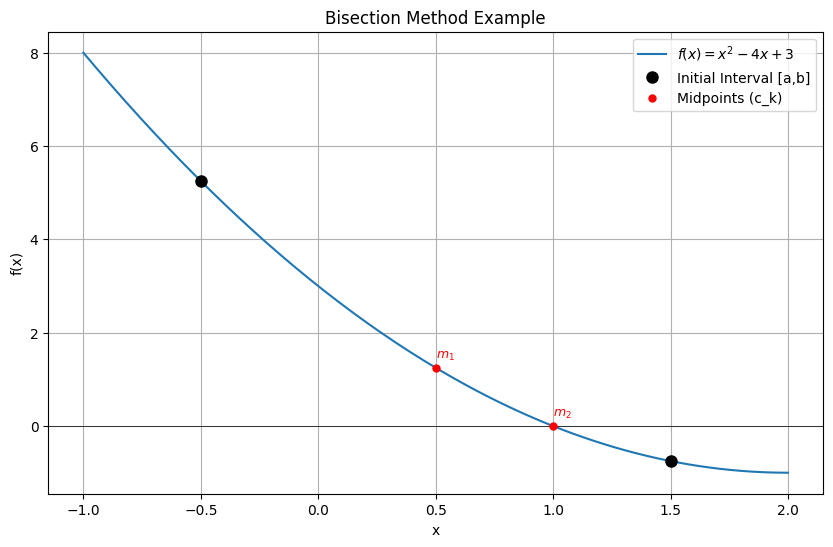

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function whose root we want to find
def example_function(x):
    return x**2 - 4*x + 3

# Bisection method parameters
a_init = -0.5  # Left endpoint of the initial interval
b_init = 1.5  # Right endpoint of the initial interval
tolerance = 1e-5 # Desired tolerance for the root
max_iterations = 20 # Maximum number of iterations

# Check if the initial interval brackets a root
f_a_init = example_function(a_init)
f_b_init = example_function(b_init)

if f_a_init * f_b_init >= 0:
    print("Initial interval does not bracket a root, or a root is at an endpoint.")
    if abs(f_a_init) < tolerance: print(f"Root found at a_init: {a_init}")
    elif abs(f_b_init) < tolerance: print(f"Root found at b_init: {b_init}")
    # exit() # Or handle error appropriately

# Variables for the bisection algorithm
a = a_init
b = b_init
iterations = 0
midpoints_history = [] # To store midpoints for plotting

print(f"Bisection for f(x) = x^2 - 4x + 3, interval [{a:.2f}, {b:.2f}]")
print("Iter |    a    |    b    |    c    |   f(c)   | Interval Width")
print("-" * 60)

for k_iter in range(max_iterations):
    iterations += 1
    c = (a + b) / 2.0
    f_c = example_function(c)
    midpoints_history.append(c)
    interval_width = b - a

    print(f"{iterations:4d} | {a:7.4f} | {b:7.4f} | {c:7.4f} | {f_c:8.2e} | {interval_width:14.4e}")

    if abs(f_c) < tolerance or interval_width / 2.0 < tolerance:
        print(f"\nConverged to root: {c:.5f} after {iterations} iterations.")
        break

    # Update the interval
    if example_function(a) * f_c < 0: # Root is in [a, c]
        b = c
    else: # Root is in [c, b]
        a = c
else: # Executed if the loop finishes without a 'break'
    print(f"\nMax iterations ({max_iterations}) reached. Best estimate: {c:.5f}")

# Plotting the function and the bisection steps
x_plot = np.linspace(min(a_init, b_init) - 0.5, max(a_init, b_init) + 0.5, 200)
y_plot = example_function(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='$f(x) = x^2 - 4x + 3$')
plt.axhline(0, color='black', lw=0.5) # x-axis

# Plot initial interval points
plt.plot([a_init, b_init], [example_function(a_init), example_function(b_init)],
         'ko', markersize=8, label='Initial Interval [a,b]')

# Plot midpoints from iterations
midpoints_array = np.array(midpoints_history)
plt.plot(midpoints_array, example_function(midpoints_array),
         'r.', markersize=10, label='Midpoints (c_k)')
for i, xc in enumerate(midpoints_array):
    plt.text(xc, example_function(xc) + 0.2, f'$m_{i+1}$', color='red', fontsize=9)


plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method Example')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
    <b>Concept Check!</b>
    <br>
    The bisection method requires an initial interval $[a,b]$ such that $G(a)$ and $G(b)$ have opposite signs to guarantee finding a root. If you mistakenly choose an initial interval where $G(a)$ and $G(b)$ have the same sign, what would happen when you try to apply the bisection algorithm?
</div>

### 3.6.3 Implementing the Implicit Infiltration Solver with Bisection

We now return to solving the nonlinear equation for our soil water drainage model:
$$
G(X) = X + \Delta t \cdot K_s \cdot X^m - \theta^k = 0
$$
where $X = \theta^{k+1}$ is our unknown. We first need a Python function that evaluates $G(X)$.

In [9]:
def G_infiltration(X_current, theta_prev, dt, Ks, m_exponent):
    """
    Calculates G(X) = X + dt*Ks*X^m - theta_prev for root finding.
    X_current:  The current guess for theta^{k+1}.
    theta_prev: Water content from previous step, theta^k.
    dt: Time step.
    Ks: Saturated hydraulic conductivity.
    m_exponent: Nonlinearity exponent (m in the equation).
    """
    term_nonlinear = dt * Ks * (X_current ** m_exponent)
    return X_current + term_nonlinear - theta_prev

Now, we can write the main time-stepping loop, incorporating the bisection logic to solve for `thetaNext` at each step.

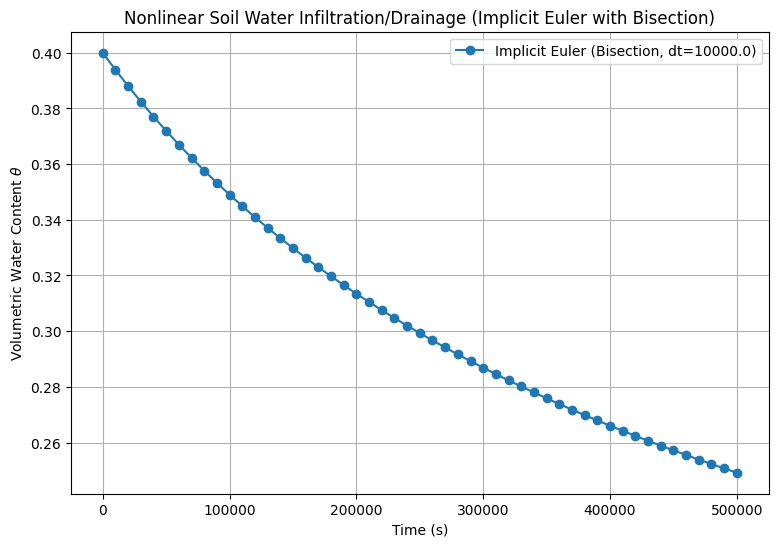

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# (G_infiltration function defined as above)

# Simulation Parameters
Ks_val = 1e-5          # Saturated hydraulic conductivity
m_val = 3              # Nonlinearity exponent
dt_val = 10000.0        # Time step (s) - can be larger for implicit
Tmax_val = 500000.0     # Total time
theta0_val = 0.4       # Initial water content

tol_bisect = 1e-7      # Tolerance for bisection
max_iter_bisect = 100  # Max iterations for bisection

# Time array and solution initialization
t_points_impl = np.arange(0, Tmax_val + dt_val, dt_val)
theta_implicit_sol = np.zeros_like(t_points_impl)
theta_implicit_sol[0] = theta0_val

# --- Time integration (Implicit Euler with Bisection Inlined) ---
for k_idx in range(len(t_points_impl) - 1):
    theta_k_prev = theta_implicit_sol[k_idx] # This is theta^k

    if theta_k_prev < tol_bisect: # If effectively zero, next step is also zero
        theta_implicit_sol[k_idx+1] = 0.0
        continue

    # Bisection method to find X = theta^{k+1}
    # Physical bounds for X = theta^{k+1} are [0, theta_k_prev]
    a_interval = 0.0
    b_interval = theta_k_prev

    Ga = G_infiltration(a_interval, theta_k_prev, dt_val, Ks_val, m_val)
    # Gb = G_infiltration(b_interval, theta_k_prev, dt_val, Ks_val, m_val)
    # We expect G(0) = -theta_k_prev <= 0
    # We expect G(theta_k_prev) = dt*Ks*(theta_k_prev)^m >= 0
    # So if theta_k_prev > 0, they should have opposite signs or one is zero.

    root_found_in_step = False
    for iter_num in range(max_iter_bisect):
        c_midpoint = (a_interval + b_interval) / 2.0

        if (b_interval - a_interval) / 2.0 < tol_bisect: # Interval width check
            theta_implicit_sol[k_idx+1] = c_midpoint
            root_found_in_step = True
            break

        Gc = G_infiltration(c_midpoint, theta_k_prev, dt_val, Ks_val, m_val)

        if abs(Gc) < tol_bisect: # Function value check
            theta_implicit_sol[k_idx+1] = c_midpoint
            root_found_in_step = True
            break

        if Ga * Gc < 0: # Root is in [a, c]
            b_interval = c_midpoint
        else: # Root is in [c, b]
            a_interval = c_midpoint
            Ga = Gc # Update Ga for the new 'a'

    if not root_found_in_step: # If max_iter reached
        theta_implicit_sol[k_idx+1] = (a_interval + b_interval) / 2.0

# --- Plotting ---
plt.figure(figsize=(9,6))
plt.plot(t_points_impl, theta_implicit_sol, 'o-',
         label=f'Implicit Euler (Bisection, dt={dt_val})')
plt.xlabel("Time (s)")
plt.ylabel("Volumetric Water Content $\\theta$")
plt.title("Nonlinear Soil Water Infiltration/Drainage (Implicit Euler with Bisection)")
plt.legend()
plt.grid(True)
plt.show()

## 3.7 Chapter Summary: First Steps in Solving ODEs Numerically

This chapter marked our transition from understanding Ordinary Differential Equations (ODEs) analytically to developing and implementing our first numerical methods for their solution.

The key concepts covered include:

- **The Need for Numerical Solutions:** Acknowledged that many real-world ODEs (especially nonlinear ones) do not admit analytical solutions, necessitating numerical approximation.

- **The Explicit Euler Method:** Derived from a forward finite difference, it's simple to implement but, as we saw, has limitations.

- **Numerical Stability:** We introduced the concept of stability, demonstrating that the Explicit Euler method is **conditionally stable**. For the decay problem, stability requires $\Delta t$ to be sufficiently small.

- **The Implicit Euler Method:** Derived by evaluating the ODE's right-hand side at the future time level, it offers **unconditional stability** for the decay problem, a significant advantage.

- **Assessing Numerical Solutions:** We defined **absolute** and **relative error** to quantify the accuracy of our solutions and introduced the concept of the **order of a method**.

- **Nonlinear ODEs and Root-Finding:** We highlighted that applying implicit methods to nonlinear ODEs results in nonlinear algebraic equations. We introduced the **bisection method** as a robust numerical technique for solving these equations by finding their roots.

This chapter has equipped us with the fundamental tools to numerically approximate solutions to ODEs.

## Chapter 3 Exercises

Apply your understanding of the concepts and methods discussed in this chapter to solve the following problems.

### E3.1: Explicit Euler for Isotope Geochemistry - Sr Evolution in Magma

In a simplified model of magma mixing, the $^{87}\text{Sr}/^{86}\text{Sr}$ isotopic ratio (denoted as $R$) in a magma chamber evolves according to the ODE:
$$ \frac{dR}{dt} = k (R_c - R) $$
where $R_c$ is the isotopic ratio of a contaminant, and $k$ is the effective contamination rate.

**Tasks:**
1.  **(Optional Bonus):** Derive the analytical solution $R(t)$ given $R(0) = R_0$.
2.  **Numerical Solution:** Given $R_0 = 0.704$, $R_c = 0.710$, $k = 5 \times 10^{-4}$, and $T_{final} = 5000$, write a Python script to solve for $R(t)$ using the Explicit Euler method.
3.  **Time Step Exploration:**
    -   Solve the ODE using $\Delta t = 100$.
    -   Investigate what happens with a very large time step, e.g., $\Delta t = 2500$.
4.  **Plotting:** Plot your numerical solutions for both time steps. If you found the analytical solution, include it for comparison.

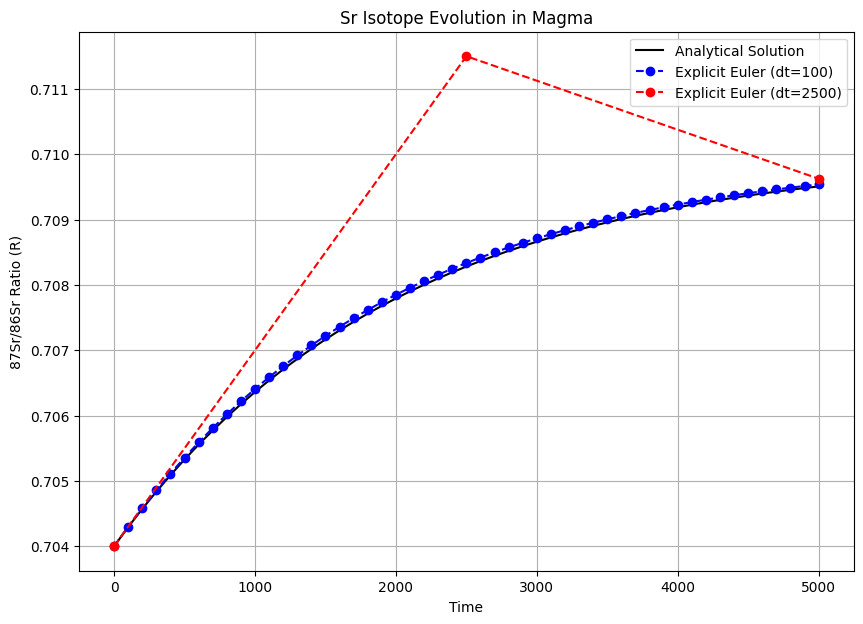

In [11]:
# Your code for Exercise 3.1 here
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
R0 = 0.704
Rc = 0.710
k = 5e-4
T_final = 5000.0

# --- Function to solve with Explicit Euler ---
def solve_sr_explicit(dt):
    # Setup arrays
    t_array = np.arange(0, T_final + dt, dt)
    R_solution = np.zeros_like(t_array)
    R_solution[0] = R0

    # Time-stepping loop
    for i in range(len(t_array) - 1):
        # Your Explicit Euler update formula here
        R_solution[i+1] = R_solution[i] + dt * k * (Rc - R_solution[i])

    return t_array, R_solution

# --- Solve for different time steps ---
t_100, R_100 = solve_sr_explicit(dt=100.0)
t_2500, R_2500 = solve_sr_explicit(dt=2500.0)

# --- Analytical Solution (Bonus) ---
# R(t) = Rc + (R0 - Rc) * exp(-k*t)
t_analytical = np.linspace(0, T_final, 500)
R_analytical = Rc + (R0 - Rc) * np.exp(-k * t_analytical)

# --- Plotting ---
plt.figure(figsize=(10, 7))
plt.plot(t_analytical, R_analytical, 'k-', label='Analytical Solution')
plt.plot(t_100, R_100, 'bo--', label='Explicit Euler (dt=100)')
plt.plot(t_2500, R_2500, 'ro--', label='Explicit Euler (dt=2500)')
plt.title("Sr Isotope Evolution in Magma")
plt.xlabel("Time")
plt.ylabel("87Sr/86Sr Ratio (R)")
plt.legend()
plt.grid(True)
plt.show()

# Stability check: The ODE can be written dR/dt = -k(R - Rc). The stability limit
# for non-growing oscillations is dt <= 2/k = 2/5e-4 = 4000.
# dt=2500 is stable but oscillatory. Try dt=4500 to see it blow up.

### E3.2: Implicit Euler for Sr Isotope Evolution

Continuing with the Sr isotope evolution problem from Exercise E3.1.

**Tasks:**
1.  **Derive Implicit Euler Update Formula:** Starting from $\frac{R^{n+1} - R^n}{\Delta t} = k (R_c - R^{n+1})$, derive the explicit algebraic formula for $R^{n+1}$.
2.  **Python Implementation:** Implement the Implicit Euler method in Python using the same parameters.
3.  **Test with Large Time Step:** Use $\Delta t = 2500$.
4.  **Plotting and Comparison:** On a new plot, show the analytical solution and the implicit solutions for $\Delta t = 100$ and $\Delta t = 2500$. Comment on the stability and accuracy.

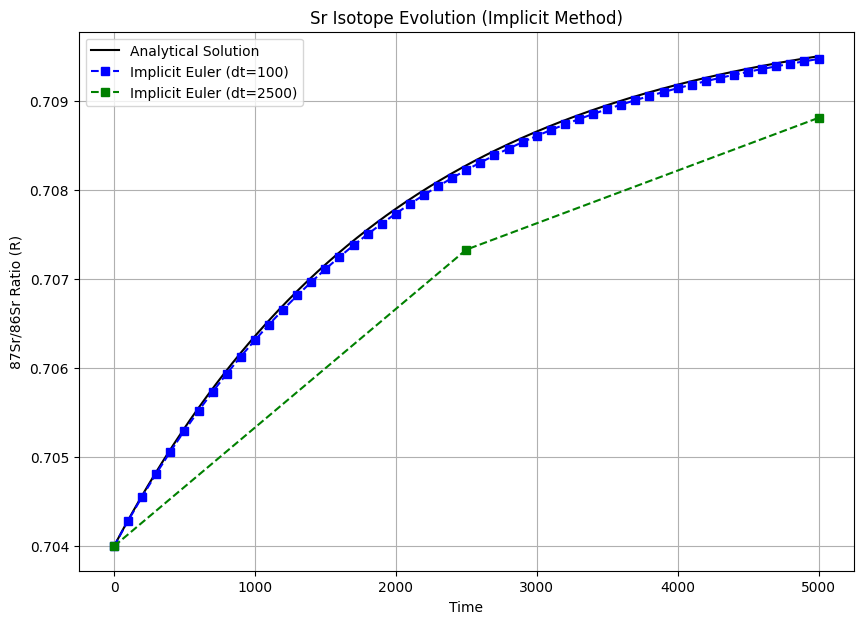

In [12]:
# Your code for Exercise 3.2 here
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters (same as before) ---
R0 = 0.704
Rc = 0.710
k = 5e-4
T_final = 5000.0

# --- Function to solve with Implicit Euler ---
def solve_sr_implicit(dt):
    t_array = np.arange(0, T_final + dt, dt)
    R_solution = np.zeros_like(t_array)
    R_solution[0] = R0

    # Time-stepping loop
    for i in range(len(t_array) - 1):
        # Your Implicit Euler update formula here
        # Derived from: R_n+1 = R_n + dt*k*(Rc - R_n+1)
        # R_n+1 * (1 + dt*k) = R_n + dt*k*Rc
        # R_n+1 = (R_n + dt*k*Rc) / (1 + dt*k)
        numerator = R_solution[i] + dt * k * Rc
        denominator = 1 + dt * k
        R_solution[i+1] = numerator / denominator

    return t_array, R_solution

# --- Solve for different time steps ---
t_imp_100, R_imp_100 = solve_sr_implicit(dt=100.0)
t_imp_2500, R_imp_2500 = solve_sr_implicit(dt=2500.0)

# --- Analytical Solution ---
t_analytical = np.linspace(0, T_final, 500)
R_analytical = Rc + (R0 - Rc) * np.exp(-k * t_analytical)

# --- Plotting ---
plt.figure(figsize=(10, 7))
plt.plot(t_analytical, R_analytical, 'k-', label='Analytical Solution')
plt.plot(t_imp_100, R_imp_100, 'bs--', label='Implicit Euler (dt=100)')
plt.plot(t_imp_2500, R_imp_2500, 'gs--', label='Implicit Euler (dt=2500)')
plt.title("Sr Isotope Evolution (Implicit Method)")
plt.xlabel("Time")
plt.ylabel("87Sr/86Sr Ratio (R)")
plt.legend()
plt.grid(True)
plt.show()

# Comment: The implicit method is stable even for the large dt=2500, showing no oscillations.
# While the accuracy is lower with the larger time step, the solution remains physically plausible.

### E3.3: Bisection Method - Finding a Bracket and Root

Consider the function $f(x) = x^3 - x - 2$.

**Tasks:**
1.  **Plot the Function:** Plot $f(x)$ for $x$ in the range $[-2, 3]$.
2.  **Find a Bracketing Interval:** Find an interval $[a,b]$ of width at least 0.5 that brackets a root. State your chosen $a, b$ and the values of $f(a), f(b)$.
3.  **Manual Bisection:** Starting with your interval, manually perform the first three iterations of the bisection method.

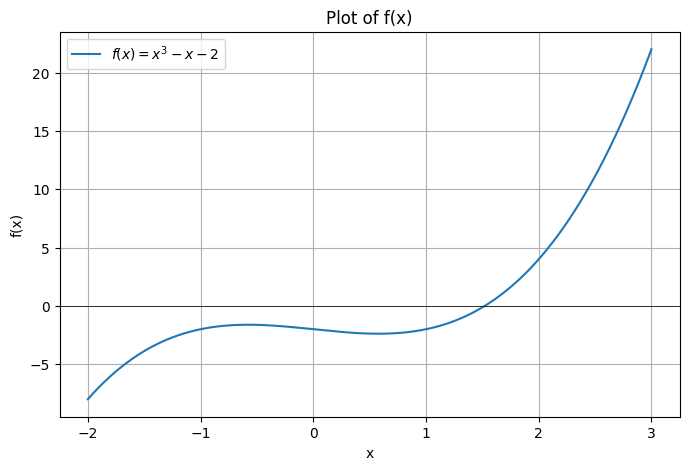

Chosen interval: [1.0, 2.0]
f(a) = f(1.0) = -2.0
f(b) = f(2.0) = 4.0
f(a) * f(b) = -8.0, which is < 0, so the interval is valid.


In [13]:
# Your code for Exercise 3.3, Task 1 & 2 here
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x - 2

# 1. Plot the function
x_vals = np.linspace(-2, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='$f(x) = x^3 - x - 2$')
plt.axhline(0, color='black', lw=0.5)
plt.title("Plot of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# 2. Find a bracketing interval
a = 1.0
b = 2.0
f_a = f(a)
f_b = f(b)

print(f"Chosen interval: [{a}, {b}]")
print(f"f(a) = f({a}) = {f_a}")
print(f"f(b) = f({b}) = {f_b}")
print(f"f(a) * f(b) = {f_a * f_b}, which is < 0, so the interval is valid.")

*Your answer for E3.3, Task 3 (Manual Bisection) here. Double-click to edit.*

**Initial Interval:** [a, b] = [1.0, 2.0], f(a) = -2.0, f(b) = 4.0

**Iteration 1:**
- c = ...
- f(c) = ...
- New Interval: [...]

**Iteration 2:**
- c = ...
- f(c) = ...
- New Interval: [...]

**Iteration 3:**
- c = ...
- f(c) = ...
- New Interval: [...]

### E3.4: Nonlinear ODE - Simplified Population Logistics with Harvesting

Consider a fish population $P(t)$ modeled by:
$$ \frac{dP}{dt} = r P \left(1 - \frac{P}{K}\right) - H $$
where $P_0 = 500$, $r = 0.2$, $K = 1000$, and $H = 70$.

**Tasks:**
1.  **Formulate $G(P^{n+1})=0$:** Apply the Implicit Euler scheme and rearrange to get an equation of the form $G(P^{n+1}) = 0$.
2.  **Python Implementation:** Write a script to solve this ODE from $t=0$ to $t=50$ years with $\Delta t = 1$ year, using the bisection method to solve for $P^{n+1}$ at each step.
3.  **Plotting:** Plot the fish population $P(t)$ versus time.

*Your answer for E3.4, Task 1 ($G(P^{n+1})$) here. Double-click to edit.*

Starting from the implicit scheme:
$$ \frac{P^{n+1} - P^n}{\Delta t} = r P^{n+1} \left(1 - \frac{P^{n+1}}{K}\right) - H $$
Rearranging gives:
$$ P^{n+1} - P^n - \Delta t \left[ r P^{n+1} - \frac{r}{K}(P^{n+1})^2 - H \right] = 0 $$
So, with $X = P^{n+1}$, the function $G(X)$ is:
$$ G(X) = X - P^n - \Delta t \left( rX - \frac{r}{K}X^2 - H \right) = 0 $$
$$ G(X) = \frac{\Delta t \cdot r}{K}X^2 + (1 - \Delta t \cdot r)X - (P^n - \Delta t \cdot H) = 0 $$

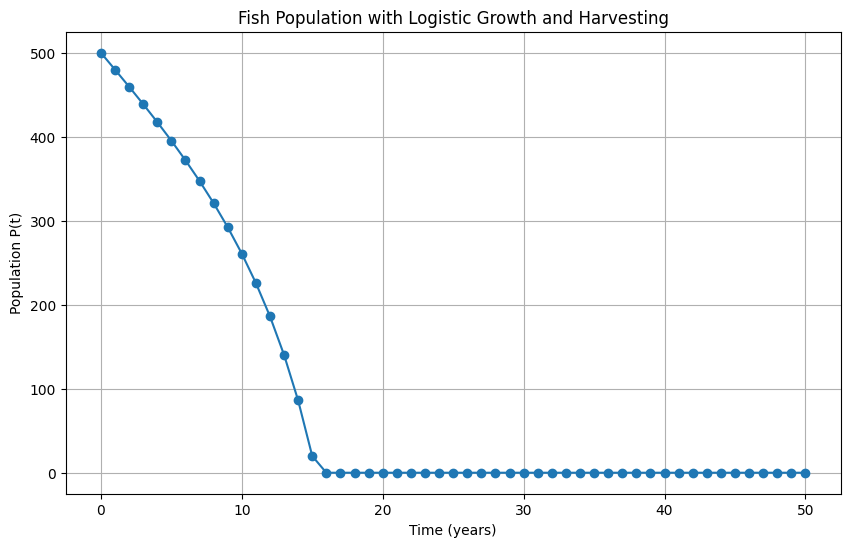

In [14]:
# Your code for Exercise 3.4, Task 2 & 3 here
import numpy as np
import matplotlib.pyplot as plt

# Bisection method function (can be copied from chapter text)
def bisection_method(G, a, b, tol=1e-6, max_iter=100):
    if G(a) * G(b) >= 0: return None # Bracketing failed
    for i in range(max_iter):
        c = (a + b) / 2.0
        if abs(G(c)) < tol or (b - a) / 2.0 < tol: return c
        if G(a) * G(c) < 0: b = c
        else: a = c
    return c

# --- Parameters ---
P0 = 500.0   # initial fish population
r = 0.2      # intrinsic growth rate
K = 1000.0   # carrying capacity
H = 70.0     # harvesting rate
T_final_pop = 50.0
dt_pop = 1.0

# --- Setup arrays ---
t_pop = np.arange(0, T_final_pop + dt_pop, dt_pop)
P_solution = np.zeros_like(t_pop)
P_solution[0] = P0

# --- Time-stepping loop ---
for i in range(len(t_pop) - 1):
    P_n = P_solution[i]

    # Define G(X) for the current step
    # G(X) = X - P_n - dt * (r*X*(1 - X/K) - H)
    G = lambda X: X - P_n - dt_pop * (r * X * (1 - X / K) - H)

    # Bracketing interval for bisection
    # A safe interval could be [0, K*1.5] for example, as population
    # is unlikely to grow much beyond K.
    a, b = 0, K * 1.5

    # Find the root for P_n+1
    P_next = bisection_method(G, a, b)
    if P_next is not None:
        P_solution[i+1] = P_next
    else:
        # Handle case where root not found (e.g., population crashes)
        P_solution[i+1] = 0

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(t_pop, P_solution, 'o-')
plt.title("Fish Population with Logistic Growth and Harvesting")
plt.xlabel("Time (years)")
plt.ylabel("Population P(t)")
plt.grid(True)
plt.show()

# Equilibrium points (where dP/dt = 0) can be found by solving the quadratic
# rP(1-P/K) - H = 0.
# The population should approach the stable equilibrium point.